In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

# 1 K-means Clustering

### Dataset Generation
- Two semi-circular clusters are generated: one facing downward and centered at (0, 0), and another facing upward and centered at (1, 0).
- Each semicircle is created using 500 points sampled with added Gaussian noise to simulate real-world variance.
- The `np.linspace` function is used to create an array of angles, and the circle parameterization formula is applied to get x and y coordinates.
- All points are combined into a single list of tuples called `data_points` to prepare them for clustering.

### K-Means Clustering
- The K-Means algorithm involves three steps: **initialization**, **iteration**, and **termination**.
- Initially, two random points in the region [−2, 3] × [−2, 2] are selected as cluster centroids.
- During iteration, data points are assigned to the nearest centroid, and the centroids are updated based on the mean of assigned points.
- This process repeats until convergence, defined by either a minimal change in centroid position or a maximum number of iterations.

The goal is to cluster the points into two groups corresponding to the original semi-circles, without using their labels.


In [ ]:
# Set a random seed for reproducibility
np.random.seed(123)

# Generate 500 angles evenly spaced between 0 and π
theta = np.linspace(0, np.pi, 500)

# Calculate x and y coordinates for the first semicircle (centered at (0,0), facing downward)
semicircle1_x = np.cos(theta)
semicircle1_y = np.sin(theta)

# Add Gaussian noise to the coordinates of the first semicircle
semicircle1_x = semicircle1_x + np.random.normal(0, 0.1, size=len(theta))
semicircle1_y = semicircle1_y + np.random.normal(0, 0.1, size=len(theta))

# Calculate x and y coordinates for the second semicircle (centered at (1,0), facing upward)
semicircle2_x = 1 + np.cos(theta)
semicircle2_y = -np.sin(theta)

# Add Gaussian noise to the coordinates of the second semicircle
semicircle2_x = semicircle2_x + np.random.normal(0, 0.1, size=len(theta))
semicircle2_y = semicircle2_y + np.random.normal(0, 0.1, size=len(theta))

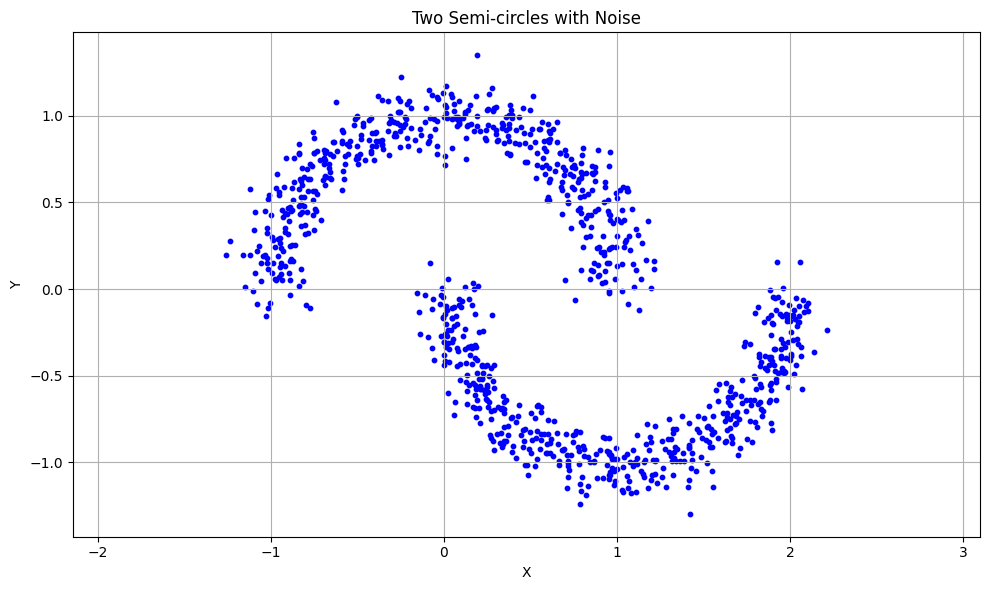

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(semicircle1_x, semicircle1_y, color='blue', s=10)
plt.scatter(semicircle2_x, semicircle2_y, color='blue', s=10)
plt.grid(True)
plt.title('Two Semi-circles with Noise')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
# Combine x and y coordinates of each semicircle into (x, y) tuples
d1 = [(x, y) for x, y in zip(semicircle1_x, semicircle1_y)]
d2 = [(x, y) for x, y in zip(semicircle2_x, semicircle2_y)]

# Merge both semicircle datasets into a single list
data_points = d1 + d2

# Print the total number of points and first few for verification
print(f"Total number of data points: {len(data_points)}")
print("First 5 data points:")
for i in range(5):
    print(data_points[i])

# Convert list of tuples to a NumPy array for efficient computation
data_points = np.array(data_points)
print(f"Shape of data array: {data_points.shape}")


Total number of data points: 1000
First 5 data points:
(np.float64(0.8914369396699439), np.float64(0.07520336682672812))
(np.float64(1.0997147263206788), np.float64(0.013259810218771439))
(np.float64(1.0282185772400134), np.float64(-0.013953341491120694))
(np.float64(0.8491921682822405), np.float64(0.11184465464680943))
(np.float64(0.9418228971106825), np.float64(0.15126257264281467))
Shape of data array: (1000, 2)


In [ ]:
# K-means clustering implementation as per instructions

# First Initialization of centroids
# Set a different seed to ensure reproducibility of centroid initialization
np.random.seed(42)
# Randomly initialize the first centroid within the region [-2, 3] × [-2, 2]
C_1 = np.random.uniform(low=[-2, -2], high=[3, 2], size=2)

# Randomly initialize the second centroid within the same region
C_2 = np.random.uniform(low=[-2, -2], high=[3, 2], size=2)

# Display the initial centroids
print(f"Initial centroid 1: {C_1}")
print(f"Initial centroid 2: {C_2}")

Initial centroid 1: [-0.12729941  1.80285723]
Initial centroid 2: [1.65996971 0.39463394]


In [ ]:
# Initialize all points to cluster 2 by default
mappings = {tuple(point): 2 for point in data_points}

# Initialize variables for iteration and convergence check
num_points_updated = 0
max_iters = 10000
current_iters = 0

while True:
    # Reset the update count for this iteration
    num_points_updated = 0
    
    for i, point in enumerate(data_points):
        # Calculate Euclidean distances to both centroids
        dist_to_C1 = np.linalg.norm(point - C_1)
        dist_to_C2 = np.linalg.norm(point - C_2)
        
        # Assign point to the nearest centroid
        nearest_cluster = 1 if dist_to_C1 < dist_to_C2 else 2
        
        # Update mapping only if the assignment has changed
        if mappings[tuple(point)] != nearest_cluster:
            mappings[tuple(point)] = nearest_cluster
            num_points_updated += 1
    
    # Group points based on current cluster assignment
    cluster1_points = np.array([point for point, cluster in mappings.items() if cluster == 1])
    cluster2_points = np.array([point for point, cluster in mappings.items() if cluster == 2])
    
    # Recompute centroids as the mean of their respective cluster points
    new_C_1 = np.mean(cluster1_points, axis=0) if len(cluster1_points) > 0 else C_1
    new_C_2 = np.mean(cluster2_points, axis=0) if len(cluster2_points) > 0 else C_2
    
    # Update centroids
    C_1 = new_C_1
    C_2 = new_C_2
    
    # Increment iteration counter
    current_iters += 1
    
    # Terminate loop if no points changed clusters or max iterations reached
    if num_points_updated == 0 or current_iters >= max_iters:
        break

# Display final results after convergence
print(f"K-means converged after {current_iters} iterations")
print(f"Final centroid 1: {C_1}")
print(f"Final centroid 2: {C_2}")
print(f"Number of points in cluster 1: {len(cluster1_points)}")
print(f"Number of points in cluster 2: {len(cluster2_points)}")

K-means converged after 12 iterations
Final centroid 1: [-0.13365774  0.56678863]
Final centroid 2: [ 1.1434172  -0.58201344]
Number of points in cluster 1: 503
Number of points in cluster 2: 497


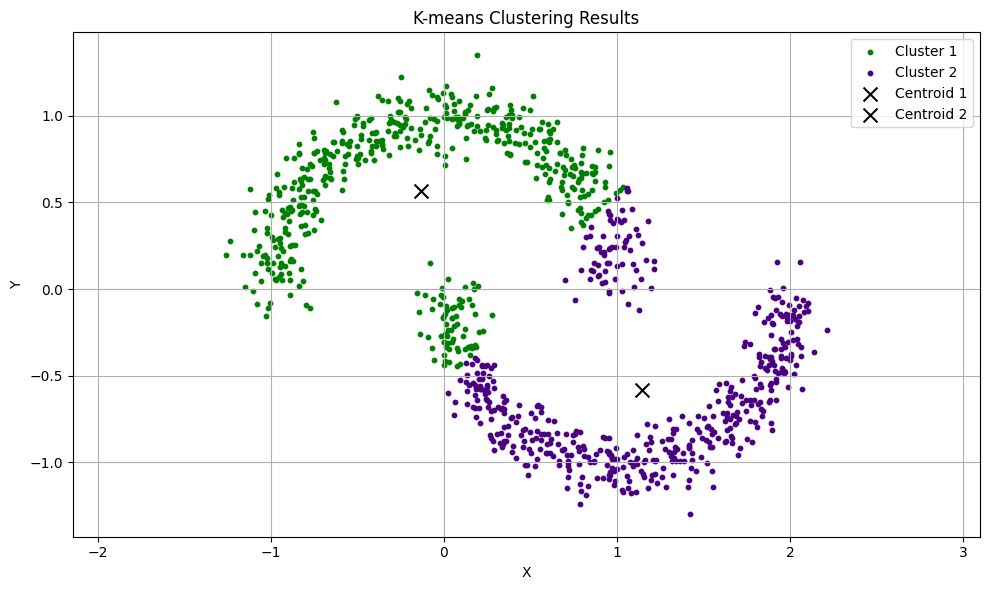

In [ ]:
plt.figure(figsize=(10, 6))
# Get points for each cluster
cluster1_x = [point[0] for point, cluster in mappings.items() if cluster == 1]
cluster1_y = [point[1] for point, cluster in mappings.items() if cluster == 1]
cluster2_x = [point[0] for point, cluster in mappings.items() if cluster == 2]
cluster2_y = [point[1] for point, cluster in mappings.items() if cluster == 2]
# Plot the clusters
plt.scatter(cluster1_x, cluster1_y, color='green', s=10, label='Cluster 1')
plt.scatter(cluster2_x, cluster2_y, color='indigo', s=10, label='Cluster 2')
# Plot the final centroids
plt.scatter(C_1[0], C_1[1], color='black', marker='x', s=100, label='Centroid 1')
plt.scatter(C_2[0], C_2[1], color='black', marker='x', s=100, label='Centroid 2')
plt.grid(True)
plt.title('K-means Clustering Results')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

# 2 K‐Means++ Clustering on the Covertype Dataset

In [ ]:
# Load the Forest CoverType dataset from sklearn's built-in datasets
data = sklearn.datasets.fetch_covtype()
# Get the total number of samples (rows) in the dataset
n_samples = data.data.shape[0]
# Print the number of samples
print(f"Total number of samples in the dataset: {n_samples}")

Total number of samples in the dataset: 581012


In [ ]:
# Create a random number generator with a fixed seed for reproducibility
rng = np.random.RandomState(42)
# Randomly select 20,000 unique indices from the dataset without replacement
indices = rng.choice(n_samples, 20000, replace=False)
# Extract the sampled subset of data using the selected indices
X_sample = data.data[indices]

print(f"Shape of the sampled data: {X_sample.shape}")

Shape of the sampled data: (20000, 54)


### Data Standardization

In this code, we are standardizing the first 10 numerical features of the dataset `X_sample` using `StandardScaler` from `sklearn.preprocessing`. The concept of standardization is to rescale the feature values so that they have a mean of 0 and a standard deviation of 1, making the data easier to compare and process, especially for algorithms like K-means, which are sensitive to the scale of the data.

#### Steps:
1. **Initialize the Scaler**:
   - `scaler = StandardScaler()`: Creates an instance of the `StandardScaler`, which will perform standardization by removing the mean and scaling to unit variance.

2. **Fit and Transform**:
   - `X_sample[:, :10] = scaler.fit_transform(X_sample[:, :10])`: 
     - The `fit_transform` method calculates the mean and standard deviation of the first 10 numerical features and uses them to standardize each value:
       $$\text{Standardized Value} = \frac{X - \mu}{\sigma}$$
     where:
     - $X$ is the original value,
     - $\mu$ is the mean of the feature,
     - $\sigma$ is the standard deviation of the feature.
   
3. **Store the Standardized Data**:
   - `X_standardized = X_sample`: The standardized data is stored in `X_standardized`, where the first 10 features are now transformed and the rest of the data remains unchanged.

The printed shape (`X_standardized.shape`) confirms the dimensions of the dataset after the transformation.

In [ ]:
# Import StandardScaler to normalize feature values
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()
# Standardize only the first 10 numerical features (leave categorical features untouched)
X_sample[:, :10] = scaler.fit_transform(X_sample[:, :10])
# Store the standardized data
X_standardized = X_sample

print(f"Shape of standardized data: {X_standardized.shape}")

Shape of standardized data: (20000, 54)


### K-means++ Initialization

The K-means++ algorithm is used to initialize the centroids more intelligently, in order to improve the convergence of the K-means clustering algorithm. The idea behind K-means++ is to spread out the initial centroids by selecting them based on the distances to the already chosen centroids. This helps to avoid poor initializations that can lead to suboptimal clustering results.

1. **Initialize the First Centroid**:
   - `first_centroid_index = np.random.randint(n_samples)`: Randomly select the first centroid from the data points.
   - `centroids.append(X[first_centroid_index])`: Add the randomly selected point as the first centroid.

2. **Select Remaining Centroids**:
   - The remaining $k - 1$ centroids are selected iteratively based on the following steps:
   
   3. **Compute Distances**:
      - For each point $X[i]$ in the dataset, the squared Euclidean distance to each already chosen centroid is calculated:
        $$\text{distance}(X[i], C_j) = \lVert X[i] - C_j \rVert^2$$
      - The minimum of these distances is stored for each point:
        $$\text{distances}[i] = \min_j \text{distance}(X[i], C_j)$$
   
   4. **Convert Distances to Probabilities**:
      - Convert the distances into probabilities for choosing the next centroid. The idea is to give higher probability to points that are farther away from the existing centroids, ensuring that centroids are well spread out:
        $$\text{probs}[i] = \frac{\text{distances}[i]}{\sum_{j} \text{distances}[j]}$$
   
   5. **Select the Next Centroid**:
      - `next_centroid_idx = np.random.choice(n_samples, p=probs)`: Select the next centroid based on the calculated probabilities.

3. **Return Final Centroids**:
   - Once all $k$ centroids are selected, return the centroids as a NumPy array:
     $$\text{centroids} = \text{np.array(centroids)}$$
   
The advantage of this method is that it tends to choose centroids that are farther apart, leading to better cluster initialization and reducing the chances of poor convergence.

In [ ]:
def kmeans_plus_plus_init(X, k):
    n_samples = X.shape[0]    
    # Initialize an empty list to hold selected centroids
    centroids = []
    # Randomly pick the first centroid from the data
    first_centroid_index = np.random.randint(n_samples)
    centroids.append(X[first_centroid_index])
    # Select the remaining k - 1 centroids
    for c in range(1, k):
        # Initialize an array to hold distances to the nearest centroid for each point
        distances = np.zeros(n_samples)
        
        for i in range(n_samples):
            # Compute squared distances from point X[i] to all selected centroids
            point_to_centroids = np.array([np.linalg.norm(X[i] - cent)**2 for cent in centroids])
            
            # Store the minimum distance for point X[i]
            distances[i] = np.min(point_to_centroids)
        
        # Convert distances into probabilities for selecting the next centroid
        probs = distances / distances.sum()
        
        # Choose the next centroid index based on the calculated probabilities
        next_centroid_idx = np.random.choice(n_samples, p=probs)
        centroids.append(X[next_centroid_idx])
    
    # Return the final list of centroids as a NumPy array
    return np.array(centroids)

### Within-Cluster Sum of Squares (WCSS)

The **Within-Cluster Sum of Squares (WCSS)** is a metric used to evaluate the compactness of clusters. It measures how tightly the points within each cluster are grouped around the centroid. A lower WCSS value indicates more compact clusters, which is desirable in clustering algorithms like K-means.

1. **Initialize WCSS**:
   - `wcss = 0`: Initialize the total WCSS to zero.

2. **Iterate Over Each Cluster**:
   - `for i in range(len(centroids))`: Loop through each cluster (i.e., each centroid).
   
   3. **Select Points in the Current Cluster**:
      - `cluster_points = X[labels == i]`: Select the points in the dataset `X` that belong to the current cluster, as indicated by the `labels` array.

   4. **Compute Squared Distances**:
      - `squared_distances = np.sum((cluster_points - centroids[i])**2, axis=1)`: For each point in the current cluster, compute the squared Euclidean distance to the centroid of that cluster. This is done by subtracting the centroid from the point and squaring the result:
        $$\text{squared distance}(X[i], C_j) = (X[i] - C_j)^2$$
      - The `axis=1` argument ensures the squared distances are computed for each point across all features.

   5. **Sum the Squared Distances**:
      - `wcss += np.sum(squared_distances)`: Add the sum of squared distances for the current cluster to the total WCSS.

3. **Return the Total WCSS**:
   - `return wcss`: Once all clusters have been processed, return the total WCSS, which is the sum of squared distances within each cluster.

In [ ]:
# Function to calculate the Within-Cluster Sum of Squares (WCSS)
def calculate_wcss(X, labels, centroids):
    wcss = 0
    for i in range(len(centroids)):  # Iterate through each cluster
        cluster_points = X[labels == i]  # Get points in the current cluster
        if len(cluster_points) > 0:
            squared_distances = np.sum((cluster_points - centroids[i])**2, axis=1)  # Compute squared distances
            wcss += np.sum(squared_distances)  # Add to total WCSS
    return wcss

### K-means Clustering Algorithm

The function `run_kmeans` implements the K-means clustering algorithm, which aims to partition the dataset into `k` clusters. It iteratively assigns data points to the nearest centroid and then updates the centroids based on the mean of the points in each cluster.

1. **Initialize Centroids**:
   - The initial centroids are chosen based on the specified initialization method:
     - If `init_method == 'kmeans++'`, centroids are initialized using the K-means++ method (spread out to avoid poor initial centroids).
     - If the method is not `'kmeans++'`, the centroids are initialized randomly by selecting `k` random data points from `X`.

2. **Initialize Variables**:
   - `n_samples = X.shape[0]`: The number of samples in the dataset.
   - `prev_labels = np.zeros(n_samples)`: Initialize the previous labels (for convergence check) to zero.
   - `labels = np.zeros(n_samples)`: Initialize an array to store the current labels (which cluster each point belongs to).
   - `converged = False`: Flag to check if the algorithm has converged.
   - `n_iterations = 0`: Count the number of iterations.

3. **K-means Iterations**:
   - The algorithm performs a maximum of `max_iters` iterations:
   
   4. **Assign Points to Nearest Centroid**:
      - For each data point, compute the Euclidean distance to each centroid using:
        $$\text{distance}(X[i], C_j) = \lVert X[i] - C_j \rVert$$
      - Assign each point to the centroid with the smallest distance.
   
   5. **Check for Convergence**:
      - If the labels (cluster assignments) do not change between iterations (`np.array_equal(labels, prev_labels)`), set `converged = True` and exit the loop.

   6. **Update Centroids**:
      - For each cluster, recalculate the centroid as the mean of the points assigned to that cluster:
        $$C_j = \frac{1}{n_j} \sum_{i \in \text{cluster j}} X[i]$$
      - `n_j` is the number of points in cluster `j`.

   7. **Store Current Labels**:
      - Store the current labels in `prev_labels` for the next iteration's convergence check.

4. **Calculate WCSS**:
   - After the algorithm converges or reaches the maximum number of iterations, calculate the **Within-Cluster Sum of Squares (WCSS)** using the `calculate_wcss` function, which measures how compact the clusters are.

5. **Return Results**:
   - The function returns a dictionary containing:
     - `centroids`: Final centroids after clustering.
     - `labels`: Cluster assignments for each data point.
     - `iterations`: Number of iterations taken to converge.
     - `converged`: Boolean indicating whether the algorithm converged.
     - `wcss`: Final WCSS value, indicating the quality of the clustering.

In [ ]:
# Function to run the K-means clustering algorithm
def run_kmeans(X, init_method, k, max_iters):
    # Initialize centroids based on the chosen method
    if init_method == 'kmeans++':
        centroids = kmeans_plus_plus_init(X, k)  # K-means++ initialization
    else:
        indices = np.random.choice(X.shape[0], size=k, replace=False)  # Random initialization
        centroids = X[indices]

    # Initialize variables
    n_samples = X.shape[0]
    prev_labels = np.zeros(n_samples)
    labels = np.zeros(n_samples)
    converged = False
    n_iterations = 0

    # K-means iterations
    for iteration in range(max_iters):
        n_iterations += 1

        # Assign each point to the nearest centroid
        for i in range(n_samples):
            distances = np.linalg.norm(X[i] - centroids, axis=1)  # Calculate distance to each centroid
            labels[i] = np.argmin(distances)  # Assign to closest centroid

        # Check for convergence
        if np.array_equal(labels, prev_labels):
            converged = True
            break

        # Update centroids by calculating the mean of points in each cluster
        for j in range(k):
            cluster_points = X[labels == j]
            if len(cluster_points) > 0:
                centroids[j] = np.mean(cluster_points, axis=0)

        # Store current labels for the next iteration's convergence check
        prev_labels = labels.copy()

    # Calculate WCSS for the final clustering result
    wcss = calculate_wcss(X, labels, centroids)

    return {
        'centroids': centroids,  # Final centroids
        'labels': labels,        # Cluster assignments
        'iterations': n_iterations,  # Number of iterations taken
        'converged': converged,  # Convergence status
        'wcss': wcss,            # Final WCSS
    }

In [14]:
k = 7  # Number of cover types
max_iters = 500
np.random.seed(100)
kmpp_results = run_kmeans(X_standardized, 'kmeans++', k, max_iters)
km_results = run_kmeans(X_standardized, 'random', k, max_iters)

In [15]:
print(f"K-means++ WC-SSD: {kmpp_results['wcss']:.2f}")
print(f"K-means with random init WC-SSD: {km_results['wcss']:.2f}")
print(f"Difference: {km_results['wcss'] - kmpp_results['wcss']:.2f}")
print(f"Relative improvement: {(km_results['wcss'] - kmpp_results['wcss']) / km_results['wcss'] * 100:.2f}%")

print("\nK-means++ iterations: {}, Converged: {}".format(
    kmpp_results['iterations'], kmpp_results['converged']))
print("K-means with random init iterations: {}, Converged: {}".format(
    km_results['iterations'], km_results['converged']))

# Print cluster sizes
print("\nK-means++ cluster sizes:")
for i in range(k):
    print(f"Cluster {i+1}: {np.sum(kmpp_results['labels'] == i)} points")

print("\nK-means with random init cluster sizes:")
for i in range(k):
    print(f"Cluster {i+1}: {np.sum(km_results['labels'] == i)} points")

K-means++ WC-SSD: 127997.05
K-means with random init WC-SSD: 128824.93
Difference: 827.88
Relative improvement: 0.64%

K-means++ iterations: 55, Converged: True
K-means with random init iterations: 34, Converged: True

K-means++ cluster sizes:
Cluster 1: 2279 points
Cluster 2: 2711 points
Cluster 3: 4331 points
Cluster 4: 5169 points
Cluster 5: 1776 points
Cluster 6: 1840 points
Cluster 7: 1894 points

K-means with random init cluster sizes:
Cluster 1: 1954 points
Cluster 2: 2133 points
Cluster 3: 5286 points
Cluster 4: 3907 points
Cluster 5: 3518 points
Cluster 6: 1476 points
Cluster 7: 1726 points


In [ ]:
# Parameters
k_range = range(1, 21)  # K from 1 to 20
num_runs = 10
max_iters = 500

# Arrays to store results
kmpp_wcss_results = []
km_wcss_results = []

### Clustering Process Across Different Values of K

This code performs the K-means clustering algorithm for multiple values of `k` (the number of clusters) and repeats the process several times (`num_runs`) to observe the variability in the clustering results. It also compares the performance of K-means++ initialization with random initialization by calculating the **Within-Cluster Sum of Squares (WCSS)** for each run.

1. **Loop Through Different Values of K**:
   - `for k_idx, k in enumerate(k_range)`: Loop over different values of `k` (number of clusters) in the given range `k_range`.

2. **Repeat the Clustering Process**:
   - `for run in range(num_runs)`: Perform `num_runs` to repeat the clustering process for better results or to assess the stability of the algorithm.

3. **Randomly Select a Subset of Data**:
   - `indices = np.random.choice(n_samples, 20000, replace=False)`: Randomly select a subset of 20,000 data points from the total sample (`n_samples`).
   - `X = data.data[indices]`: Select the subset of data using the indices.

4. **Standardize the Data**:
   - `scaler = StandardScaler()`: Initialize a `StandardScaler` to standardize the features.
   - `X_sample[:, :10] = scaler.fit_transform(X_sample[:, :10])`: Standardize only the first 10 numerical features of the data using the `fit_transform` method.
   - `X_standardized = X_sample`: Store the standardized data for clustering.

5. **Run K-means++ Initialization**:
   - `kmpp_wcss = run_kmeans(X_standardized, 'kmeans++', k, max_iters)`: Run the K-means clustering with K-means++ initialization and store the WCSS result in `kmpp_wcss`.
   - `kmpp_wcss_results.append(kmpp_wcss['wcss'])`: Append the WCSS value for this run to the list `kmpp_wcss_results`.

6. **Run Random Initialization**:
   - `km_wcss = run_kmeans(X_standardized, 'random', k, max_iters)`: Run K-means clustering with random initialization and store the WCSS result in `km_wcss`.
   - `km_wcss_results.append(km_wcss['wcss'])`: Append the WCSS value for this run to the list `km_wcss_results`.

The goal is to compare the performance of K-means++ (which generally leads to better clustering) versus random initialization across different values of `k` and across multiple runs.

In [ ]:
# Loop through different values of K
for k_idx, k in enumerate(k_range):
    print(f"Processing K = {k}")
    # Repeat the clustering process for the number of runs
    for run in range(num_runs):
        # Randomly select a subset of the data
        indices = np.random.choice(n_samples, 20000, replace=False)
        X = data.data[indices] 
        # Standardize the first 10 features of the sample
        scaler = StandardScaler()
        X_sample[:, :10] = scaler.fit_transform(X_sample[:, :10])
        X_standardized = X_sample  # Use standardized data for clustering
        
        # Run K-means++ initialization and store WCSS result
        kmpp_wcss = run_kmeans(X_standardized, 'kmeans++', k, max_iters)
        kmpp_wcss_results.append(kmpp_wcss['wcss'])
        
        # Run random initialization and store WCSS result
        km_wcss = run_kmeans(X_standardized, 'random', k, max_iters)
        km_wcss_results.append(km_wcss['wcss'])

Processing K = 1
Processing K = 2
Processing K = 3
Processing K = 4
Processing K = 5
Processing K = 6
Processing K = 7
Processing K = 8
Processing K = 9
Processing K = 10
Processing K = 11
Processing K = 12
Processing K = 13
Processing K = 14
Processing K = 15
Processing K = 16
Processing K = 17
Processing K = 18
Processing K = 19
Processing K = 20


In [ ]:
# Reshape the WCSS results for K-means++ and random initialization
kmpp_array = np.array(kmpp_wcss_results).reshape(len(k_range), num_runs)
km_array = np.array(km_wcss_results).reshape(len(k_range), num_runs)

# Compute the mean WCSS for each value of K across all runs
kmpp_means = kmpp_array.mean(axis=1)
km_means = km_array.mean(axis=1)

# Save the results to NPZ files
np.savez('kmpp_results.npz', kmpp_means=kmpp_means)
np.savez('km_results.npz', km_means=km_means

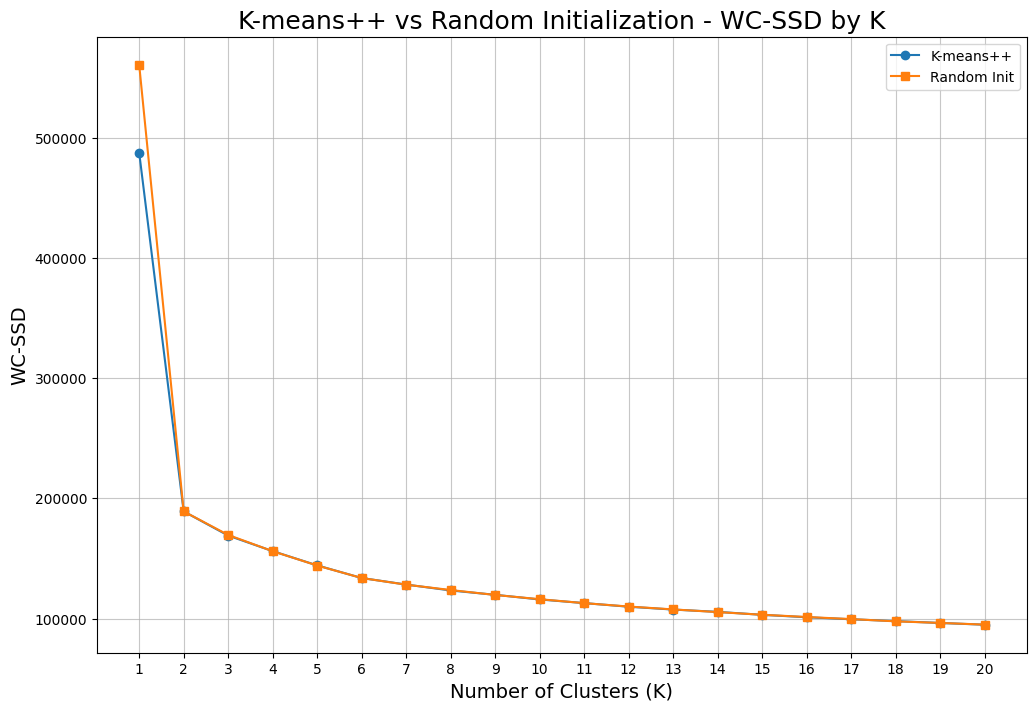

In [ ]:
# Load the saved files
kmpp_data = np.load('kmpp_results.npz')
km_data = np.load('km_results.npz')

# Extract the arrays
kmpp_means = kmpp_data['kmpp_means']
km_means = km_data['km_means']

# Generate k_range assuming it's from 1 to 20
k_range = np.arange(1, 21)

plt.figure(figsize=(12, 8))
plt.plot(k_range, kmpp_means, 'o-', label='K-means++')
plt.plot(k_range, km_means, 's-', label='Random Init')
plt.xlabel('Number of Clusters (K)', fontsize=14)
plt.ylabel('WC-SSD', fontsize=14)
plt.title('K-means++ vs Random Initialization - WC-SSD by K', fontsize=18)
plt.xticks(ticks=np.arange(1, 21))  # Set x-axis ticks to integers from 1 to 20
plt.legend()
plt.grid(True, alpha=0.7)
plt.show()